In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize
from scipy.stats import t, ttest_ind

In [2]:
bodf = pd.read_csv('boxoffice.csv',index_col=0)
bodf.head()

,imdbID,Title,Year,Rated,Budget,Domestic Gross,Opening Weekend,imdbRating,imdbVotes,Rotten Tomatoes Score,...,Runtime,Director,Actors,Awards,vote_average,vote_count,belongs_to_collection,production_companies,spoken_languages,multiplier
0,tt0114709,Toy Story,1995,G,NaN,191796233.0,29140617.0,8.3,820774.0,100.0,...,81.0,John Lasseter,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney",Nominated for 3 Oscars. Another 23 wins & 17 n...,7.7,5415.0,"{'id': 10194, 'name': 'Toy Story Collection', ...","[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_639_1': 'en', 'name': 'English'}]",6.581749
1,tt0113497,Jumanji,1995,PG,65000000.0,100475249.0,11084370.0,7.0,276338.0,54.0,...,104.0,Joe Johnston,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",4 wins & 9 nominations.,6.9,2413.0,NaN,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",9.064588
2,tt0113228,Grumpier Old Men,1995,PG-13,NaN,71518503.0,7797185.0,6.7,22673.0,17.0,...,101.0,Howard Deutch,"Walter Matthau, Jack Lemmon, Sophia Loren, Ann...",2 wins & 2 nominations.,6.5,92.0,"{'id': 119050, 'name': 'Grumpy Old Men Collect...","[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_639_1': 'en', 'name': 'English'}]",9.172349
3,tt0114885,Waiting to Exhale,1995,R,NaN,67052156.0,14126927.0,5.9,8898.0,56.0,...,124.0,Forest Whitaker,"Whitney Houston, Angela Bassett, Loretta Devin...",8 wins & 9 nominations.,6.1,34.0,NaN,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_639_1': 'en', 'name': 'English'}]",4.746408
4,tt0113041,Father of the Bride Part II,1995,PG,NaN,76594107.0,11134978.0,6.0,31909.0,48.0,...,106.0,Charles Shyer,"Steve Martin, Diane Keaton, Martin Short, Kimb...",Nominated for 1 Golden Globe. Another 1 win & ...,5.7,173.0,"{'id': 96871, 'name': 'Father of the Bride Col...","[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_639_1': 'en', 'name': 'English'}]",6.878694


In [3]:
bodf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12047 entries, 0 to 45373
Data columns (total 22 columns):
imdbID                   10793 non-null object
Title                    12047 non-null object
Year                     12047 non-null object
Rated                    11534 non-null object
Budget                   2972 non-null float64
Domestic Gross           12047 non-null float64
Opening Weekend          11022 non-null float64
imdbRating               12046 non-null float64
imdbVotes                12045 non-null float64
Rotten Tomatoes Score    11248 non-null float64
Metascore                8974 non-null float64
Genre                    12045 non-null object
Runtime                  12044 non-null float64
Director                 12042 non-null object
Actors                   11992 non-null object
Awards                   9804 non-null object
vote_average             11884 non-null float64
vote_count               11884 non-null float64
belongs_to_collection    1519 non-null

In [4]:
bodf.describe()

,Budget,Domestic Gross,Opening Weekend,imdbRating,imdbVotes,Rotten Tomatoes Score,Metascore,Runtime,vote_average,vote_count,multiplier
count,2.972000e+03,1.204700e+04,1.102200e+04,12046.000000,1.204500e+04,11248.000000,8974.000000,12044.000000,11884.000000,11884.000000,11022.000000
mean,4.439488e+07,2.155059e+07,5.629878e+06,6.451337,5.058787e+04,59.125445,57.346891,104.818001,5.834239,187.550067,22.756284
std,4.494077e+07,4.719193e+07,1.376996e+07,0.984722,1.224700e+05,27.648677,17.593263,21.546312,1.628050,630.690179,118.109832
min,2.200000e+02,3.000000e+01,2.000000e+01,1.500000,1.700000e+01,0.000000,1.000000,4.000000,0.000000,0.000000,0.480129
25%,1.300000e+07,1.394235e+05,1.714725e+04,5.900000,2.523000e+03,37.000000,45.000000,92.000000,5.300000,6.000000,2.548041
50%,3.000000e+07,2.479538e+06,1.940740e+05,6.500000,9.456000e+03,64.000000,59.000000,101.000000,6.100000,19.000000,3.960321
75%,6.000000e+07,2.180542e+07,5.520745e+06,7.200000,4.182100e+04,83.000000,71.000000,113.000000,6.800000,94.000000,11.084361
max,3.000000e+08,9.366622e+08,2.479667e+08,9.300000,2.154564e+06,100.000000,100.000000,566.000000,10.000000,12114.000000,5757.944732


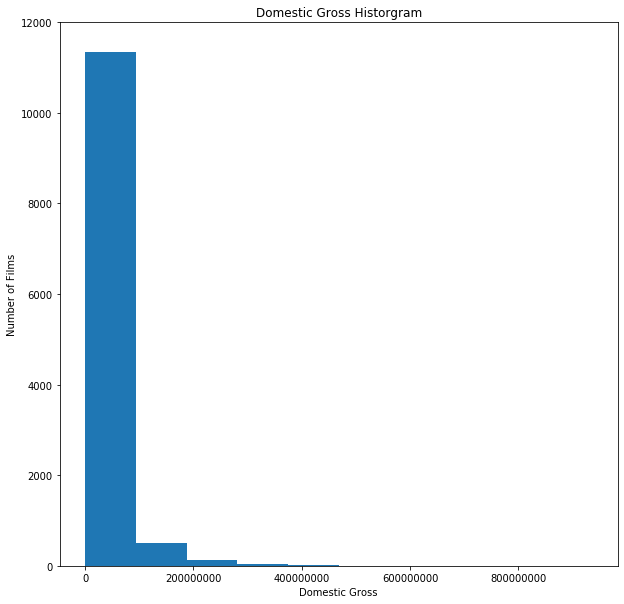

In [5]:
_ = plt.figure(figsize=(10,10))
_ = plt.hist(bodf['Domestic Gross'])
_ = plt.title('Domestic Gross Historgram')
_ = plt.xlabel('Domestic Gross')
_ = plt.ylabel('Number of Films')
_ = plt.ylim(0,12000)
_ = plt.ticklabel_format(useOffset= False,style= 'plain')
plt.show()

In [6]:
gross_mean = bodf['Domestic Gross'].mean()
gross_std = bodf['Domestic Gross'].std()
print('The Domestic Gross Mean:  ',gross_mean)
print('The Domestic Gross STD:  ',gross_std)

The Domestic Gross Mean:   21550590.411471736
The Domestic Gross STD:   47191928.34335942


In [7]:
n = len(bodf['Domestic Gross'])
critical_value = t(n-1).ppf(0.95)
gross_mean - critical_value/np.sqrt(n) * gross_std

20843314.40459191

In [8]:
good_reception = bodf[bodf['Rotten Tomatoes Score'] >= 80]
bad_reception = bodf[bodf['Rotten Tomatoes Score'] <= 50]
ttest_ind(good_reception['Domestic Gross'], bad_reception['Domestic Gross'])

Ttest_indResult(statistic=1.0499541555088001, pvalue=0.29377218114055226)

In [9]:
ttest_ind(good_reception['Domestic Gross'], bad_reception['Domestic Gross'], equal_var= False)

Ttest_indResult(statistic=1.002691382117037, pvalue=0.3160543117486095)

In [10]:
np.random.seed(47)
N_rep = 10000
mean_replicates = np.empty(N_rep)
for i in range(N_rep):
    mean_replicates[i] = np.mean(np.random.choice(bodf['Domestic Gross'],n))
gross_confidence_interval = np.percentile(mean_replicates,[2.5,97.5])
gross_confidence_interval

array([20724001.08044326, 22401433.42465552])

In [11]:
np.random.seed(47)
diff_std_replicates = np.empty(N_rep)
for i in range(N_rep):
    good_sample = np.random.choice(good_reception['Domestic Gross'], len(good_reception['Domestic Gross']))
    bad_sample = np.random.choice(bad_reception['Domestic Gross'], len(bad_reception['Domestic Gross']))
    diff_std_replicates[i] = np.std(good_sample) - np.std(bad_sample)
confidence_interval = np.percentile(diff_std_replicates,[2.5,97.5])
confidence_interval

array([16568197.88699419, 30692934.73917676])

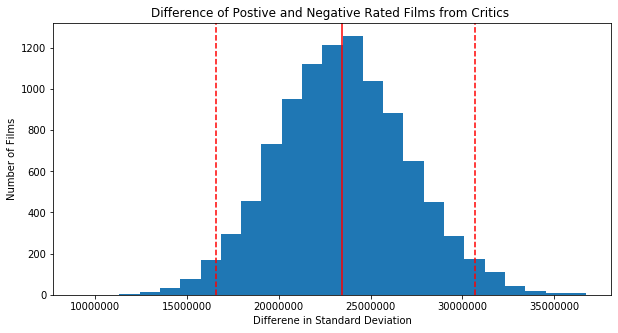

In [12]:
_ = plt.figure(figsize=(10,5))
_ = plt.hist(diff_std_replicates,bins=25)
_ = plt.title('Difference of Postive and Negative Rated Films from Critics ')
_ = plt.xlabel('Differene in Standard Deviation')
_ = plt.ylabel('Number of Films')
_ = plt.ticklabel_format(useOffset=False, style='plain')
_ = plt.axvline(np.mean(diff_std_replicates),color='r')
_ = plt.axvline(confidence_interval[0],color='r',linestyle='--')
_ = plt.axvline(confidence_interval[1],color='r',linestyle='--')

In [13]:
mean_diff = np.mean(good_reception['Domestic Gross']) - np.mean(bad_reception['Domestic Gross'])
mean_diff

1153874.825096164

In [14]:
np.random.seed(47)
bad_shifted = bad_reception['Domestic Gross'] - np.mean(bad_reception['Domestic Gross']) + np.mean(good_reception['Domestic Gross'])

In [15]:
def permutation(d1,d2):
    d3 = np.concatenate((d1,d2))
    data = np.random.permutation(d3)
    perm_sample1 = data[:len(d1)]
    perm_sample2 = data[len(d1):]
    return perm_sample1,perm_sample2

In [16]:
permutation_mean_replicates = np.empty(N_rep)
for i in range(N_rep):
    perm_good, perm_bad = permutation(good_reception['Domestic Gross'],bad_shifted)
    permutation_mean_replicates[i] = np.mean(perm_good) - np.mean(perm_bad)

In [17]:
p_value = np.sum(permutation_mean_replicates >= mean_diff)/len(permutation_mean_replicates)
p_value

0.146

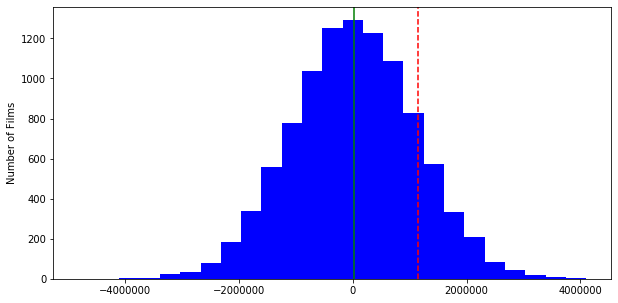

In [18]:
_ = plt.figure(figsize=(10,5))
_ = plt.ylabel('Number of Films')
_ = plt.hist(mean_diff, bins=25)
_ = plt.hist(permutation_mean_replicates,bins=25,color='blue')
_ = plt.ylabel('Number of Films')
_ = plt.axvline(np.mean(permutation_mean_replicates), color='green')
_ = plt.axvline(np.mean(mean_diff),color='red',linestyle='--')

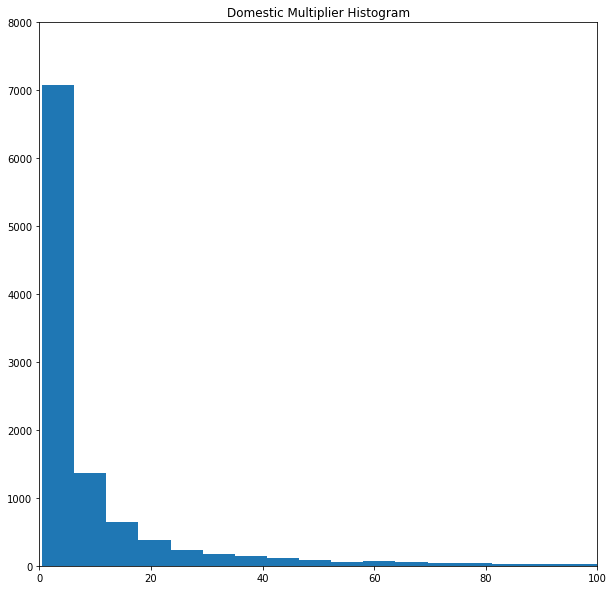

In [20]:
_ = plt.figure(figsize=(10,10))
_ = plt.hist(bodf['multiplier'],bins=1000)
_ = plt.title('Domestic Multiplier Histogram')
_ = plt.ylim(0,8000)
_ = plt.xlim(0,100)
plt.show()

In [21]:
multiplier_df = bodf[bodf['multiplier'].notnull()]
multiplier = multiplier_df['multiplier']
multiplier_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11022 entries, 0 to 45373
Data columns (total 22 columns):
imdbID                   9935 non-null object
Title                    11022 non-null object
Year                     11022 non-null object
Rated                    10581 non-null object
Budget                   2896 non-null float64
Domestic Gross           11022 non-null float64
Opening Weekend          11022 non-null float64
imdbRating               11021 non-null float64
imdbVotes                11020 non-null float64
Rotten Tomatoes Score    10390 non-null float64
Metascore                8427 non-null float64
Genre                    11020 non-null object
Runtime                  11019 non-null float64
Director                 11017 non-null object
Actors                   10972 non-null object
Awards                   9010 non-null object
vote_average             10874 non-null float64
vote_count               10874 non-null float64
belongs_to_collection    1364 non-null 

In [22]:
multiplier_mean = multiplier.mean()
multiplier_std = multiplier.std()
print('Multiplier Mean:  ',multiplier_mean)
print('Multiplier STD:  ',multiplier_std)

Multiplier Mean:   22.756283565105736
Multiplier STD:   118.10983175753526


In [23]:
n = len(multiplier)
critical_value = t(n-1).ppf(0.95)
gross_mean - critical_value/np.sqrt(n) * gross_std

20811153.23111374

In [24]:
good_reception = multiplier_df[multiplier_df['Rotten Tomatoes Score'] >= 80]
bad_reception = multiplier_df[multiplier_df['Rotten Tomatoes Score'] <= 50]
ttest_ind(good_reception.multiplier, bad_reception.multiplier)

Ttest_indResult(statistic=12.436325302577908, pvalue=3.8584860950018517e-35)

In [25]:
ttest_ind(good_reception.multiplier, bad_reception.multiplier, equal_var= False)

Ttest_indResult(statistic=12.019602629691791, pvalue=7.112933842141865e-33)

In [26]:
np.random.seed(47)
N_rep = 10000
mean_replicates = np.empty(N_rep)
for i in range(N_rep):
    mean_replicates[i] = np.mean(np.random.choice(multiplier,len(multiplier)))
multiplier_confidence_interval = np.percentile(mean_replicates,[2.5,97.5])
multiplier_confidence_interval

array([20.73640892, 25.12030666])

In [27]:
np.random.seed(47)
diff_std_replicates = np.empty(N_rep)
for i in range(N_rep):
    good_sample = np.random.choice(good_reception.multiplier, len(good_reception.multiplier))
    bad_sample = np.random.choice(bad_reception.multiplier, len(bad_reception.multiplier))
    diff_std_replicates[i] = np.std(good_sample) - np.std(bad_sample)
confidence_interval = np.percentile(diff_std_replicates,[2.5,97.5])
confidence_interval

array([-52.15590659, 120.67444392])

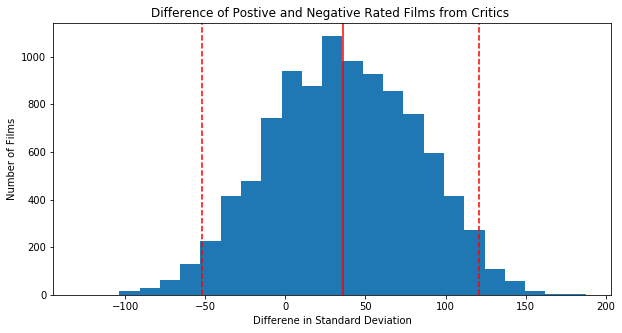

In [28]:
_ = plt.figure(figsize=(10,5))
_ = plt.title('Difference of Postive and Negative Rated Films from Critics ')
_ = plt.xlabel('Differene in Standard Deviation')
_ = plt.ylabel('Number of Films')
_ = plt.hist(diff_std_replicates,bins=25)
_ = plt.ticklabel_format(useOffset=False, style='plain')
_ = plt.axvline(np.mean(diff_std_replicates),color='r')
_ = plt.axvline(confidence_interval[0],color='r',linestyle='--')
_ = plt.axvline(confidence_interval[1],color='r',linestyle='--')

In [29]:
mean_diff = np.mean(good_reception['multiplier']) - np.mean(bad_reception['multiplier'])
mean_diff

36.383638869354755

In [30]:
np.random.seed(47)
bad_shifted = bad_reception.multiplier - np.mean(bad_reception.multiplier) + np.mean(good_reception.multiplier)

In [31]:
permutation_mean_replicates = np.empty(N_rep)
for i in range(N_rep):
    perm_good, perm_bad = permutation(good_reception.multiplier,bad_shifted)
    permutation_mean_replicates[i] = np.mean(perm_good) - np.mean(perm_bad)

In [32]:
p_value = np.sum(permutation_mean_replicates >= mean_diff)/len(permutation_mean_replicates)
p_value

0.0

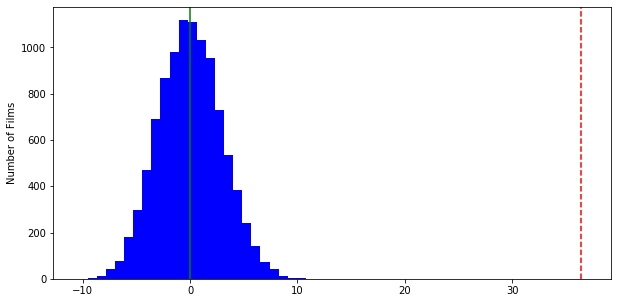

In [33]:
_ = plt.figure(figsize=(10,5))
_ = plt.hist(mean_diff, bins=25)
_ = plt.hist(permutation_mean_replicates,bins=25,color='blue')
_ = plt.ylabel('Number of Films')
_ = plt.axvline(np.mean(permutation_mean_replicates), color='green')
_ = plt.axvline(np.mean(mean_diff),color='red',linestyle='--')

In [34]:
good_reception = bodf[bodf['imdbRating'] > 7.5]
bad_reception = bodf[bodf['imdbRating'] < 5.5]
ttest_ind(good_reception['Domestic Gross'], bad_reception['Domestic Gross'])

Ttest_indResult(statistic=10.53086741859825, pvalue=1.6454432563032533e-25)

In [35]:
ttest_ind(good_reception['Domestic Gross'], bad_reception['Domestic Gross'], equal_var= False)

Ttest_indResult(statistic=9.647709014383754, pvalue=1.816727978608195e-21)

In [36]:
np.random.seed(47)
N_rep = 10000
mean_replicates = np.empty(N_rep)
for i in range(N_rep):
    mean_replicates[i] = np.mean(np.random.choice(bodf['Domestic Gross'],len(bodf['Domestic Gross'])))
gross_confidence_interval = np.percentile(mean_replicates,[2.5,97.5])
gross_confidence_interval

array([20724001.08044326, 22401433.42465552])

In [37]:
np.random.seed(47)
diff_std_replicates = np.empty(N_rep)
for i in range(N_rep):
    good_sample = np.random.choice(good_reception['Domestic Gross'], len(good_reception['Domestic Gross']))
    bad_sample = np.random.choice(bad_reception['Domestic Gross'], len(bad_reception['Domestic Gross']))
    diff_std_replicates[i] = np.std(good_sample) - np.std(bad_sample)
confidence_interval = np.percentile(diff_std_replicates,[2.5,97.5])
confidence_interval

array([41989618.33889896, 64092731.19290581])

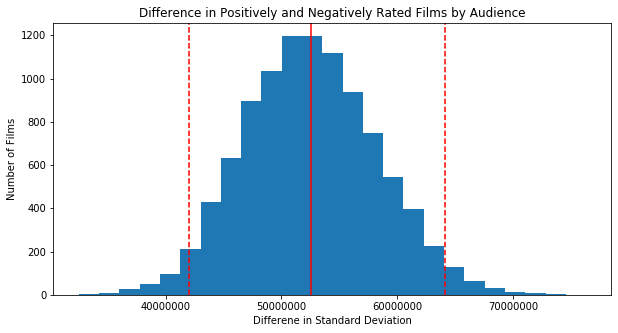

In [38]:
_ = plt.figure(figsize=(10,5))
_ = plt.hist(diff_std_replicates,bins=25)
_ = plt.ticklabel_format(useOffset=False, style='plain')
_ = plt.title('Difference in Positively and Negatively Rated Films by Audience')
_ = plt.xlabel('Differene in Standard Deviation')
_ = plt.ylabel('Number of Films')
_ = plt.axvline(np.mean(diff_std_replicates),color='r')
_ = plt.axvline(confidence_interval[0],color='r',linestyle='--')
_ = plt.axvline(confidence_interval[1],color='r',linestyle='--')

In [39]:
mean_diff = np.mean(good_reception['Domestic Gross']) - np.mean(bad_reception['Domestic Gross'])
mean_diff

21562746.958332308

In [40]:
np.random.seed(47)
bad_shifted = bad_reception['Domestic Gross'] - np.mean(bad_reception['Domestic Gross']) + np.mean(good_reception['Domestic Gross'])

In [41]:
permutation_mean_replicates = np.empty(N_rep)
for i in range(N_rep):
    perm_good, perm_bad = permutation(good_reception['Domestic Gross'],bad_shifted)
    permutation_mean_replicates[i] = np.mean(perm_good) - np.mean(perm_bad)

In [42]:
p_value = np.sum(permutation_mean_replicates >= mean_diff)/len(permutation_mean_replicates)
p_value

0.0

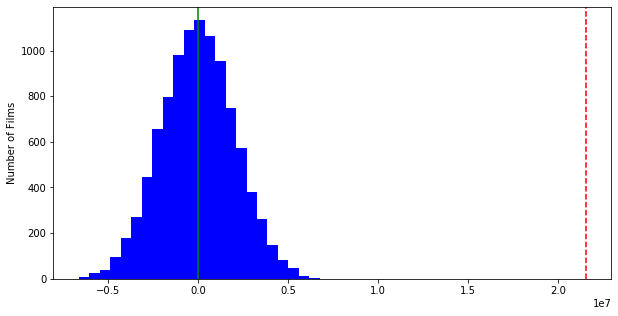

In [44]:
_ = plt.figure(figsize=(10,5))
_ = plt.hist(mean_diff, bins=25)
_ = plt.hist(permutation_mean_replicates,bins=25,color='blue')
_ = plt.ylabel('Number of Films')
_ = plt.axvline(np.mean(permutation_mean_replicates), color='green')
_ = plt.axvline(np.mean(mean_diff),color='red',linestyle='--')

In [45]:
good_reception = multiplier_df[multiplier_df['imdbRating'] >= 7.5]
bad_reception = multiplier_df[multiplier_df['imdbRating'] <= 5.5]
ttest_ind(good_reception.multiplier, bad_reception.multiplier)

Ttest_indResult(statistic=12.863954175531452, pvalue=5.188186792388572e-37)

In [46]:
ttest_ind(good_reception.multiplier, bad_reception.multiplier, equal_var= False)

Ttest_indResult(statistic=12.158341057591917, pvalue=5.562531411374487e-33)

In [47]:
np.random.seed(47)
N_rep = 10000
mean_replicates = np.empty(N_rep)
for i in range(N_rep):
    mean_replicates[i] = np.mean(np.random.choice(multiplier,len(multiplier)))
multiplier_confidence_interval = np.percentile(mean_replicates,[2.5,97.5])
multiplier_confidence_interval

array([20.73640892, 25.12030666])

In [48]:
np.random.seed(47)
diff_std_replicates = np.empty(N_rep)
for i in range(N_rep):
    good_sample = np.random.choice(good_reception.multiplier, len(good_reception.multiplier))
    bad_sample = np.random.choice(bad_reception.multiplier, len(bad_reception.multiplier))
    diff_std_replicates[i] = np.std(good_sample) - np.std(bad_sample)
confidence_interval = np.percentile(diff_std_replicates,[2.5,97.5])
confidence_interval

array([ 12.91763416, 119.55957122])

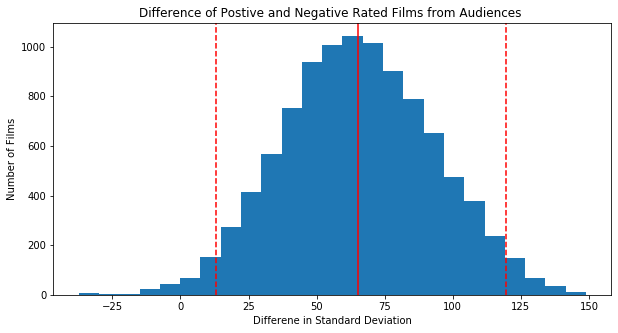

In [49]:
_ = plt.figure(figsize=(10,5))
_ = plt.hist(diff_std_replicates,bins=25)
_ = plt.title('Difference of Postive and Negative Rated Films from Audiences ')
_ = plt.xlabel('Differene in Standard Deviation')
_ = plt.ylabel('Number of Films')
_ = plt.axvline(np.mean(diff_std_replicates),color='r')
_ = plt.axvline(confidence_interval[0],color='r',linestyle='--')
_ = plt.axvline(confidence_interval[1],color='r',linestyle='--')

In [50]:
mean_diff = np.mean(good_reception['multiplier']) - np.mean(bad_reception['multiplier'])
mean_diff

46.71371523088091

In [51]:
np.random.seed(47)
bad_shifted = bad_reception.multiplier - np.mean(bad_reception.multiplier) + np.mean(good_reception.multiplier)

In [52]:
permutation_mean_replicates = np.empty(N_rep)
for i in range(N_rep):
    perm_good, perm_bad = permutation(good_reception.multiplier,bad_shifted)
    permutation_mean_replicates[i] = np.mean(perm_good) - np.mean(perm_bad)

In [53]:
p_value = np.sum(permutation_mean_replicates >= mean_diff)/len(permutation_mean_replicates)
p_value

0.0

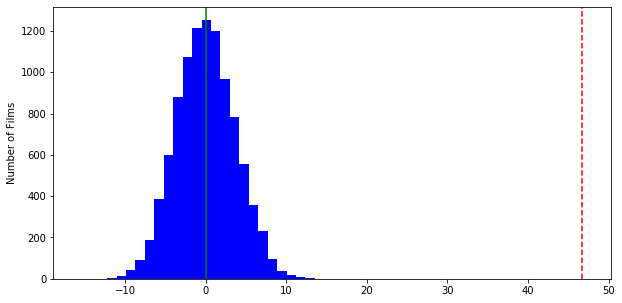

In [54]:
_ = plt.figure(figsize=(10,5))
_ = plt.hist(mean_diff, bins=25)
_ = plt.hist(permutation_mean_replicates,bins=25,color='blue')
_ = plt.ylabel('Number of Films')
_ = plt.axvline(np.mean(permutation_mean_replicates), color='green')
_ = plt.axvline(np.mean(mean_diff),color='red',linestyle='--')